In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics 
np.random.seed(0)

In [2]:
filename = 'WT2340'
datos=pd.read_csv('../Data/SCADA_data_{}.csv'.format(filename))

In [3]:
datos

id  ld_id              date_time  fake_data  NumSampleTenMinBin  \
0       3257116   2340  2013-01-01 00:00:00.0          0                 600   
1       3257117   2340  2013-01-01 00:10:00.0          0                 600   
2       3257118   2340  2013-01-01 00:20:00.0          0                 600   
3       3257119   2340  2013-01-01 00:30:00.0          0                 600   
4       3257120   2340  2013-01-01 00:40:00.0          0                 600   
...         ...    ...                    ...        ...                 ...   
357985  9614853   2340  2019-10-28 00:10:00.0          0                 600   
357986  9614854   2340  2019-10-28 00:20:00.0          0                 600   
357987  9614855   2340  2019-10-28 00:30:00.0          0                 600   
357988  9614856   2340  2019-10-28 00:40:00.0          0                 600   
357989  9614857   2340  2019-10-28 00:50:00.0          0                 600   

        AcumGralPala1Mean  AcumGralPala1Sdev  AcumGralPala1Min  \
0                     NaN                NaN               NaN   
1                     NaN                NaN               NaN   
2                     NaN                NaN               NaN   
3                     NaN                NaN               NaN   
4                     NaN                NaN               NaN   
...                   ...                ...               ...   
357985            223.502            2.63735           219.879   
357986            224.400            2.70229           219.544   
357987            221.538            4.21179           214.079   
357988            222.808            5.14361           211.347   
357989            223.479            2.30250           220.508   

        AcumGralPala1Max  AcumGralPala2Mean  ...  VelRotorMin  VelRotorMax  \
0                    NaN                NaN  ...          NaN          NaN   
1                    NaN                NaN  ...          NaN          NaN   
2                    NaN                NaN  ...          NaN          NaN   
3                    NaN                NaN  ...          NaN          NaN   
4                    NaN                NaN  ...          NaN          NaN   
...                  ...                ...  ...          ...          ...   
357985           227.901            216.182  ...      11.4500      12.8700   
357986           228.222            216.221  ...      11.4511      12.3100   
357987           226.641            216.763  ...      11.4900      12.6828   
357988           228.705            216.502  ...      11.8300      12.9100   
357989           228.222            216.399  ...      12.0600      13.8900   

        VelVientoMean  VelVientoSdev  VelVientoMin  VelVientoMax  YawMean  \
0                 NaN            NaN           NaN           NaN      NaN   
1                 NaN            NaN           NaN           NaN      NaN   
2                 NaN            NaN           NaN           NaN      NaN   
3                 NaN            NaN           NaN           NaN      NaN   
4                 NaN            NaN           NaN           NaN      NaN   
...               ...            ...           ...           ...      ...   
357985        6.52633       0.363017       5.64041       7.68385  230.709   
357986        6.29913       0.284847       5.40787       7.17321  231.000   
357987        6.39509       0.285768       5.61743       7.08704  231.000   
357988        6.55319       0.284075       5.82109       7.39623  231.000   
357989        6.86706       0.359707       5.51238       7.98165  231.000   

        YawSdev   YawMin  YawMax  
0           NaN      NaN     NaN  
1           NaN      NaN     NaN  
2           NaN      NaN     NaN  
3           NaN      NaN     NaN  
4           NaN      NaN     NaN  
...         ...      ...     ...  
357985  1.01903  226.927   231.0  
357986  0.00000  231.000   231.0  
357987  0.00000  231.000   231.0  
357988  0.00000  231.000   231.0  
357989  0.00

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.DataFrame({'date_time': datos['date_time'] ,'TempEjeLento_1': datos['TempEjeLento_1'], 'TempAmbMean': datos['TempAmbMean'], 'TempRodamMultipMean': datos['TempRodamMultipMean'], 'TempCojLAMean': datos['TempCojLAMean'],'TempCojLOAMean': datos['TempCojLOAMean'], 'TempGenMean': datos['TempGenMean'], 'PotMean': datos['PotMean'], 'VelRotorMean': datos['VelRotorMean']})
cols = df.columns.tolist()

In [6]:
cols

['date_time',
 'TempEjeLento_1',
 'TempAmbMean',
 'TempRodamMultipMean',
 'TempCojLAMean',
 'TempCojLOAMean',
 'TempGenMean',
 'PotMean',
 'VelRotorMean']

In [5]:
#PotMean
df['PotMean'][df['PotMean']< 0] = None
df['PotMean'][df['PotMean']> 2000] = None
#TempAmbMean
df['TempAmbMean'][df['TempAmbMean']< -5] = None
df['TempAmbMean'][df['TempAmbMean']> 40] = None
#TempCojLAMean
df['TempCojLAMean'][df['TempCojLAMean']< 0] = None
df['TempCojLAMean'][df['TempCojLAMean']> 120] = None
#TempCojLOAMean
df['TempCojLOAMean'][df['TempCojLOAMean']< 0] = None
df['TempCojLOAMean'][df['TempCojLOAMean']> 120] = None
#TempEjeLento_1
df['TempEjeLento_1'][df['TempEjeLento_1']< 0] = None
df['TempEjeLento_1'][df['TempEjeLento_1']> 120] = None
#TempGenMean
df['TempGenMean'][df['TempGenMean']< 0] = None
df['TempGenMean'][df['TempGenMean']> 175] = None
#TempRodamMultipMean
df['TempRodamMultipMean'][df['TempRodamMultipMean']< 0] = None
df['TempRodamMultipMean'][df['TempRodamMultipMean']> 120] = None
#VelRotorMean
df['VelRotorMean'][df['VelRotorMean']< 0] = None
df['VelRotorMean'][df['VelRotorMean']> 50] = None

In [6]:
df['TempAmbMean']=df['TempAmbMean'].interpolate(method='pchip', order=3, limit_area='inside')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='backfill')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='ffill')

df['TempEjeLento_1']=df['TempEjeLento_1'].interpolate(method='pchip', order=3)
df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='backfill')

df['TempRodamMultipMean']=df['TempRodamMultipMean'].interpolate(method='pchip', order=3)
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='backfill')

df['TempCojLAMean']=df['TempCojLAMean'].interpolate(method='pchip', order=3)
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='backfill')

df['TempCojLOAMean']=df['TempCojLOAMean'].interpolate(method='pchip', order=3)
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='backfill')

df['TempGenMean']=df['TempGenMean'].interpolate(method='pchip', order=3)
df['TempGenMean']=df['TempGenMean'].fillna(method='backfill')

df['PotMean']=df['PotMean'].interpolate(method='pchip', order=3)
df['PotMean']=df['PotMean'].fillna(method='backfill')

df['VelRotorMean']=df['VelRotorMean'].interpolate(method='pchip', order=3)
df['VelRotorMean']=df['VelRotorMean'].fillna(method='backfill')

df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='ffill')
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='ffill')
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='ffill')
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='ffill')
df['TempGenMean']=df['TempGenMean'].fillna(method='ffill')
df['PotMean']=df['PotMean'].fillna(method='ffill')
df['VelRotorMean']=df['VelRotorMean'].fillna(method='ffill')

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
datos_listos=df.copy()

In [9]:
datos_t=pd.DataFrame({ 'TempEjeLento_1':df['TempEjeLento_1'],'date_time': df['date_time'] ,})
datos_t.drop([0], inplace=True)
datos_t.reset_index(drop=True, inplace=True)
datos_t

TempEjeLento_1              date_time
0         2.815880e+01  2013-01-01 00:10:00.0
1         2.815880e+01  2013-01-01 00:20:00.0
2         2.815880e+01  2013-01-01 00:30:00.0
3         2.815880e+01  2013-01-01 00:40:00.0
4         2.815880e+01  2013-01-01 00:50:00.0
...                ...                    ...
357984   -4.267943e+07  2019-10-28 00:10:00.0
357985   -4.268213e+07  2019-10-28 00:20:00.0
357986   -4.268484e+07  2019-10-28 00:30:00.0
357987   -4.268754e+07  2019-10-28 00:40:00.0
357988   -4.269024e+07  2019-10-28 00:50:00.0

[357989 rows x 2 columns]

In [10]:
datos_tmenos1=pd.DataFrame({'TempEjeLento_1-1': df['TempEjeLento_1'],'TempAmbMean-1': df['TempAmbMean'], 'TempRodamMultipMean-1': df['TempRodamMultipMean'],'TempCojLOAMean-1': df['TempCojLOAMean'], 'TempGenMean-1': df['TempGenMean'], 'PotMean-1': df['PotMean'], 'VelRotorMean-1': df['VelRotorMean']})
datos_tmenos1.drop([len(df['VelRotorMean'])-1], inplace=True)
datos_tmenos1.reset_index(drop=True, inplace=True)
datos_tmenos1

TempEjeLento_1-1  TempAmbMean-1  TempRodamMultipMean-1  \
0           2.815880e+01        3.11798                23.8817   
1           2.815880e+01        3.11798                23.8817   
2           2.815880e+01        3.11798                23.8817   
3           2.815880e+01        3.11798                23.8817   
4           2.815880e+01        3.11798                23.8817   
...                  ...            ...                    ...   
357984     -4.267673e+07       19.19140                54.1065   
357985     -4.267943e+07       19.11620                55.3743   
357986     -4.268213e+07       19.04100                56.6421   
357987     -4.268484e+07       18.96570                57.9099   
357988     -4.268754e+07       18.89050                59.1778   

        TempCojLOAMean-1  TempGenMean-1  PotMean-1  VelRotorMean-1  
0                12.1472        24.1077      0.000          0.0000  
1                12.1472        24.1077      0.000          0.0000  
2                12.1472        24.1077      0.000          0.0000  
3                12.1472        24.1077      0.000          0.0000  
4                12.1472        24.1077      0.000          0.0000  
...                  ...            ...        ...             ...  
357984           36.1931        53.0059    127.865         11.6930  
357985           36.3170        53.2210    193.506         12.1973  
357986           36.4409        53.4360    165.561         11.7739  
357987           36.5648        53.6510    179.026         11.9873  
357988           36.6976        53.8660    195.650         12.2826  

[357989 rows x 7 columns]

In [11]:
datos_listos=pd.DataFrame({'date_time': datos_t['date_time'], 'TempEjeLento_1-1': datos_tmenos1['TempEjeLento_1-1'],'TempAmbMean-1': datos_tmenos1['TempAmbMean-1'],'TempRodamMultipMean-1': datos_tmenos1['TempRodamMultipMean-1'],'TempCojLOAMean-1': datos_tmenos1['TempCojLOAMean-1'],'TempGenMean-1': datos_tmenos1['TempGenMean-1'], 'PotMean-1': datos_tmenos1['PotMean-1'], 'VelRotorMean-1': datos_tmenos1['VelRotorMean-1'],'TempEjeLento_1': datos_t['TempEjeLento_1']})
datos_listos

date_time  TempEjeLento_1-1  TempAmbMean-1  \
0       2013-01-01 00:10:00.0      2.815880e+01        3.11798   
1       2013-01-01 00:20:00.0      2.815880e+01        3.11798   
2       2013-01-01 00:30:00.0      2.815880e+01        3.11798   
3       2013-01-01 00:40:00.0      2.815880e+01        3.11798   
4       2013-01-01 00:50:00.0      2.815880e+01        3.11798   
...                       ...               ...            ...   
357984  2019-10-28 00:10:00.0     -4.267673e+07       19.19140   
357985  2019-10-28 00:20:00.0     -4.267943e+07       19.11620   
357986  2019-10-28 00:30:00.0     -4.268213e+07       19.04100   
357987  2019-10-28 00:40:00.0     -4.268484e+07       18.96570   
357988  2019-10-28 00:50:00.0     -4.268754e+07       18.89050   

        TempRodamMultipMean-1  TempCojLOAMean-1  TempGenMean-1  PotMean-1  \
0                     23.8817           12.1472        24.1077      0.000   
1                     23.8817           12.1472        24.1077      0.000   
2                     23.8817           12.1472        24.1077      0.000   
3                     23.8817           12.1472        24.1077      0.000   
4                     23.8817           12.1472        24.1077      0.000   
...                       ...               ...            ...        ...   
357984                54.1065           36.1931        53.0059    127.865   
357985                55.3743           36.3170        53.2210    193.506   
357986                56.6421           36.4409        53.4360    165.561   
357987                57.9099           36.5648        53.6510    179.026   
357988                59.1778           36.6976        53.8660    195.650   

        VelRotorMean-1  TempEjeLento_1  
0               0.0000    2.815880e+01  
1               0.0000    2.815880e+01  
2               0.0000    2.815880e+01  
3               0.0000    2.815880e+01  
4               0.0000    2.815880e+01  
...                ...             ...  
357984         11.6930   -4.267943e+07  
357985         12.1973   -4.268213e+07  
357986         11.7739   -4.268484e+07  
357987         11.9873   -4.268754e+07  
357988         12.2826   -4.269024e+07  

[357989 rows x 9 columns]

In [12]:
def normalizado(df,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17):
    

        datos_norm=pd.DataFrame({"date_time": df['date_time']})
        datos_norm["TempEjeLento_1-1"] = (df['TempEjeLento_1-1']-b1)/(a1-b1)
        datos_norm["TempAmbMean-1"]= (df['TempAmbMean-1']-b2)/(a2-b2)
        datos_norm["TempRodamMultipMean-1"] = (df['TempRodamMultipMean-1']-b6)/(a6-b6)
        #datos_norm["TempCojLAMean-1"] = (df['TempCojLAMean-1']-b8)/(a8-b8) 
        datos_norm["TempCojLOAMean-1"] = (df['TempCojLOAMean-1']-b10)/(a10-b10) 
        datos_norm["TempGenMean-1"] = (df['TempGenMean-1']-b12)/(a12-b12)
        datos_norm["PotMean-1"] = (df['PotMean-1']-b14)/(a14-b14) 
        datos_norm["VelRotorMean-1"] = (df['VelRotorMean-1']-b16)/(a16-b16)
        datos_norm["TempEjeLento_1"] = (df['TempEjeLento_1']-b17)/(a17-b17)
        #datos_norm['date_time'] = df['date_time']

        return datos_norm

In [13]:
from datetime import datetime,timedelta
datos_listos['date_time']=pd.to_datetime(datos_listos['date_time'])

In [14]:
data_tv=datos_listos.copy()
mask = ((data_tv['date_time'] >= '2017-02-06 00:00:00') & (data_tv['date_time'] < '2018-01-01 00:00:00') ) 
train_tv=data_tv.loc[mask]
train_tv.reset_index(drop=True, inplace=True)

In [15]:
longitud=len(train_tv)
#longitud=longitud*70/100
longitud=(longitud)/144
longitud=longitud*90/100
longitud=round(longitud)
longitud=longitud*144
longitud

42624

In [16]:
training=train_tv.loc[0:round(longitud)-1]
training.reset_index(drop=True, inplace=True)
training

date_time  TempEjeLento_1-1  TempAmbMean-1  \
0     2017-02-06 00:00:00           21.1077        6.49125   
1     2017-02-06 00:10:00           21.1322        6.44994   
2     2017-02-06 00:20:00           21.1397        6.40863   
3     2017-02-06 00:30:00           21.2277        6.36732   
4     2017-02-06 00:40:00           21.3063        6.32601   
...                   ...               ...            ...   
42619 2017-11-28 23:10:00           31.8559       10.47350   
42620 2017-11-28 23:20:00           32.1545       10.47090   
42621 2017-11-28 23:30:00           32.4528       10.46840   
42622 2017-11-28 23:40:00           32.7510       10.46580   
42623 2017-11-28 23:50:00           33.0493       10.46330   

       TempRodamMultipMean-1  TempCojLOAMean-1  TempGenMean-1  PotMean-1  \
0                    68.6762           37.3697        78.2684   1512.300   
1                    68.5342           37.2976        78.8612   1526.400   
2                    68.3922           37.2255        79.4540   1518.200   
3                    68.2502           37.1533        80.0467   1512.680   
4                    68.1082           37.0812        80.6395   1504.080   
...                      ...               ...            ...        ...   
42619                69.6500           33.4463        51.6281    713.054   
42620                68.6468           33.6394        52.5712    651.937   
42621                67.9836           33.8325        53.5144    600.716   
42622                68.7727           34.0256        54.4576    710.002   
42623                69.7268           34.2187        55.4008   1128.110   

       VelRotorMean-1  TempEjeLento_1  
0             17.2635         21.1322  
1             17.1156         21.1397  
2             17.1088         21.2277  
3             17.0724         21.3063  
4             17.5235         21.2617  
...               ...             ...  
42619         16.9930         32.1545  
42620         16.7866         32.4528  
42621         16.3684         32.7510  
42622         17.3726         33.0493  
42623         18.1800         33.3476  

[42624 rows x 9 columns]

In [17]:
from numpy import array
df=training

a1=df['TempEjeLento_1-1'].values.max()
b1=df['TempEjeLento_1-1'].values.min()
a2=df['TempAmbMean-1'].values.max()
b2=df['TempAmbMean-1'].values.min()
a6=df['TempRodamMultipMean-1'].values.max()
b6=df['TempRodamMultipMean-1'].values.min()
#a8=df['TempCojLAMean-1'].values.max()
#b8=df['TempCojLAMean-1'].values.min()
a10=df['TempCojLOAMean-1'].values.max()
b10=df['TempCojLOAMean-1'].values.min()
a12=df['TempGenMean-1'].values.max()
b12=df['TempGenMean-1'].values.min()
a14=df['PotMean-1'].values.max()
b14=df['PotMean-1'].values.min()
a16=df['VelRotorMean-1'].values.max()
b16=df['VelRotorMean-1'].values.min()
a17=df['TempEjeLento_1'].values.max()
b17=df['TempEjeLento_1'].values.min()

In [18]:
training=normalizado(training,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
training

date_time  TempEjeLento_1-1  TempAmbMean-1  \
0     2017-02-06 00:00:00          0.241297       0.210126   
1     2017-02-06 00:10:00          0.241848       0.209087   
2     2017-02-06 00:20:00          0.242017       0.208049   
3     2017-02-06 00:30:00          0.243997       0.207010   
4     2017-02-06 00:40:00          0.245766       0.205972   
...                   ...               ...            ...   
42619 2017-11-28 23:10:00          0.483154       0.310227   
42620 2017-11-28 23:20:00          0.489873       0.310162   
42621 2017-11-28 23:30:00          0.496585       0.310099   
42622 2017-11-28 23:40:00          0.503295       0.310033   
42623 2017-11-28 23:50:00          0.510008       0.309970   

       TempRodamMultipMean-1  TempCojLOAMean-1  TempGenMean-1  PotMean-1  \
0                   0.935493          0.498725       0.664302   0.985308   
1                   0.933426          0.497721       0.669601   0.994495   
2                   0.931358          0.496717       0.674900   0.989152   
3                   0.929290          0.495712       0.680197   0.985556   
4                   0.927222          0.494708       0.685496   0.979952   
...                      ...               ...            ...        ...   
42619               0.949674          0.444089       0.426179   0.464576   
42620               0.935065          0.446778       0.434609   0.424756   
42621               0.925408          0.449467       0.443040   0.391384   
42622               0.936899          0.452156       0.451471   0.462587   
42623               0.950792          0.454846       0.459901   0.734997   

       VelRotorMean-1  TempEjeLento_1  
0            0.946173        0.241848  
1            0.938067        0.242017  
2            0.937695        0.243997  
3            0.935700        0.245766  
4            0.960423        0.244762  
...               ...             ...  
42619        0.931348        0.489873  
42620        0.920036        0.496585  
42621        0.897115        0.503295  
42622        0.952153        0.510008  
42623        0.996405        0.516720  

[42624 rows x 9 columns]

In [19]:
validation=train_tv.loc[round(longitud):len(train_tv)]
validation.reset_index(drop=True, inplace=True)
validation=normalizado(validation,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
validation

date_time  TempEjeLento_1-1  TempAmbMean-1  \
0    2017-11-29 00:00:00          0.516720       0.309905   
1    2017-11-29 00:10:00          0.523716       0.309842   
2    2017-11-29 00:20:00          0.531007       0.309779   
3    2017-11-29 00:30:00          0.538300       0.309239   
4    2017-11-29 00:40:00          0.545590       0.308203   
...                  ...               ...            ...   
4747 2017-12-31 23:10:00          0.317061       0.261992   
4748 2017-12-31 23:20:00          0.308481       0.261478   
4749 2017-12-31 23:30:00          0.299901       0.260964   
4750 2017-12-31 23:40:00          0.291319       0.260450   
4751 2017-12-31 23:50:00          0.282442       0.259937   

      TempRodamMultipMean-1  TempCojLOAMean-1  TempGenMean-1  PotMean-1  \
0                  0.963854          0.457536       0.468331   0.687357   
1                  0.968820          0.460225       0.476762   0.649905   
2                  0.971740          0.462914       0.485193   0.649832   
3                  0.974659          0.465603       0.493702   0.801244   
4                  0.977579          0.468292       0.502712   0.820497   
...                     ...               ...            ...        ...   
4747               0.757517          0.471094       0.697844   0.070380   
4748               0.717373          0.468139       0.679386   0.000000   
4749               0.688508          0.465184       0.660928   0.000000   
4750               0.659643          0.462228       0.642471   0.000000   
4751               0.630777          0.459273       0.624325   0.000000   

      VelRotorMean-1  TempEjeLento_1  
0           0.991116        0.523716  
1           0.993527        0.531007  
2           0.977244        0.538300  
3           0.997051        0.545590  
4           0.996766        0.552883  
...              ...             ...  
4747        0.152811        0.308481  
4748        0.027563        0.299901  
4749        0.011515        0.291319  
4750        0.022477        0.282442  
4751        0.022772        0.273031  

[4752 rows x 9 columns]

In [20]:
test=datos_listos.copy()
mask = ((test['date_time'] >= '2018-01-01 00:00:00') & (test['date_time'] < '2018-12-01 00:00:00')) 
test=test.loc[mask]
test.reset_index(drop=True, inplace=True)
test=normalizado(test,a1,b1,a2,b2,a6,b6,a10,b10,a12,b12,a14,b14,a16,b16,a17,b17)
test

date_time  TempEjeLento_1-1  TempAmbMean-1  \
0     2018-01-01 00:00:00          0.273031       0.259423   
1     2018-01-01 00:10:00          0.263612       0.258909   
2     2018-01-01 00:20:00          0.254193       0.258395   
3     2018-01-01 00:30:00          0.244773       0.257882   
4     2018-01-01 00:40:00          0.235354       0.257368   
...                   ...               ...            ...   
47659 2018-11-30 23:10:00          0.236263       0.223214   
47660 2018-11-30 23:20:00          0.234940       0.221787   
47661 2018-11-30 23:30:00          0.233617       0.220359   
47662 2018-11-30 23:40:00          0.232294       0.218931   
47663 2018-11-30 23:50:00          0.230939       0.217954   

       TempRodamMultipMean-1  TempCojLOAMean-1  TempGenMean-1  PotMean-1  \
0                   0.601913          0.456270       0.613424   0.000000   
1                   0.573048          0.452410       0.605563   0.000106   
2                   0.548587          0.448172       0.597703   0.000124   
3                   0.539707          0.443935       0.589841   0.000142   
4                   0.532193          0.439696       0.581981   0.000160   
...                      ...               ...            ...        ...   
47659               0.732235          0.369691       0.350212   0.067500   
47660               0.728146          0.368420       0.349322   0.116076   
47661               0.721449          0.367149       0.348432   0.106608   
47662               0.714587          0.365877       0.347541   0.094981   
47663               0.707726          0.364606       0.346650   0.073805   

       VelRotorMean-1  TempEjeLento_1  
0            0.018878        0.263612  
1            0.022455        0.254193  
2            0.023423        0.244773  
3            0.021529        0.235354  
4            0.021468        0.227080  
...               ...             ...  
47659        0.639760        0.234940  
47660        0.647510        0.233617  
47661        0.645405        0.232294  
47662        0.640593        0.230939  
47663        0.638324        0.229573  

[47664 rows x 9 columns]

In [21]:
from numpy import array
from numpy import hstack

def datosstack(data):
    
        X1 = array(data['TempAmbMean-1'])
        X2 = array(data['TempRodamMultipMean-1'])
        #X3 = array(data['TempCojLAMean-1'])
        X3 = array(data['TempCojLOAMean-1'])
        X4 = array(data['TempGenMean-1'])
        X5 = array(data['PotMean-1'])
        X6 = array(data['VelRotorMean-1'])
        X7 = array(data['TempEjeLento_1-1'])
        X8 = array(data['TempEjeLento_1'])

        X1 = X1.reshape((len(X1), 1))
        X2 = X2.reshape((len(X2), 1))
        X3 = X3.reshape((len(X3), 1))
        X4 = X4.reshape((len(X4), 1))
        X5 = X5.reshape((len(X5), 1))
        X6 = X6.reshape((len(X6), 1))
        X7 = X7.reshape((len(X7), 1))
        X8 = X8.reshape((len(X8), 1))
        #X9 = X8.reshape((len(X9), 1))
        
        dataset = hstack((X1, X2, X3, X4, X5, X6, X7, X8))            

        return dataset 

In [22]:
dataset_train=datosstack(training)
dataset_validation=datosstack(validation)
dataset_test=datosstack(test)

dataset_train.shape

(42624, 8)

In [23]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        #end_ix = n_steps*i + n_steps
        end_ix = i + n_steps
        #start_ix = end_ix - n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [24]:
n_steps = 144
xtrain, ytrain = split_sequences(dataset_train, n_steps)
print(xtrain.shape, ytrain.shape)

(42481, 144, 7) (42481,)


In [25]:
xvalidation, yvalidation = split_sequences(dataset_validation, n_steps)
print(xvalidation.shape, yvalidation.shape)

(4609, 144, 7) (4609,)


In [26]:
xtest, ytest = split_sequences(dataset_test, n_steps)
print(xtest.shape, ytest.shape)

(47521, 144, 7) (47521,)


## Evaluación del modelo

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
model = keras.models.load_model('../Models/model_{}_v2.h5'.format(filename))

In [29]:
pred = model.predict(xtest)
score = np.sqrt(metrics.mean_squared_error(pred,ytest))
print("Score RMSE: {}".format(score))

1486/1486 [==============================] - 26s 17ms/step
Score RMSE: 0.06176078836518474


In [30]:
def diferencia(predict,test):
    ypred = []
    for data in predict:
      ypred.append(data[0])
    df_test = pd.DataFrame({'Real': list(test), 'Prediction': ypred})
    df_test['Difference'] = (df_test['Real'] - df_test['Prediction']).abs()
    return  df_test

In [31]:
df_test=diferencia(pred,ytest)
df_test

Real  Prediction  Difference
0      0.176869    0.286972    0.110103
1      0.178154    0.285077    0.106923
2      0.179441    0.288497    0.109056
3      0.180595    0.289985    0.109389
4      0.180694    0.294636    0.113942
...         ...         ...         ...
47516  0.234940    0.286421    0.051481
47517  0.233617    0.287458    0.053841
47518  0.232294    0.286475    0.054181
47519  0.230939    0.286036    0.055097
47520  0.229573    0.285711    0.056138

[47521 rows x 3 columns]

In [32]:
df_test['Difference'].max()

0.2037595764868571

### Unión de la data

In [33]:
xfulldata = np.concatenate((xtrain,xvalidation,xtest))
xfulldata.shape

(94611, 144, 7)

In [34]:
yfulldata = np.concatenate((ytrain,yvalidation,ytest))
yfulldata.shape

(94611,)

In [35]:
yfullpred = model.predict(xfulldata)

2957/2957 [==============================] - 47s 16ms/step


In [36]:
df_full=diferencia(yfullpred,yfulldata)
df_full

Real  Prediction  Difference
0      0.380947    0.391891    0.010944
1      0.382797    0.392152    0.009356
2      0.381660    0.392310    0.010650
3      0.379939    0.392775    0.012836
4      0.380900    0.392646    0.011746
...         ...         ...         ...
94606  0.234940    0.286421    0.051481
94607  0.233617    0.287458    0.053841
94608  0.232294    0.286475    0.054181
94609  0.230939    0.286036    0.055097
94610  0.229573    0.285711    0.056138

[94611 rows x 3 columns]

In [37]:
df_full['Difference'].max()

0.4805517792701721

<AxesSubplot:ylabel='Real'>

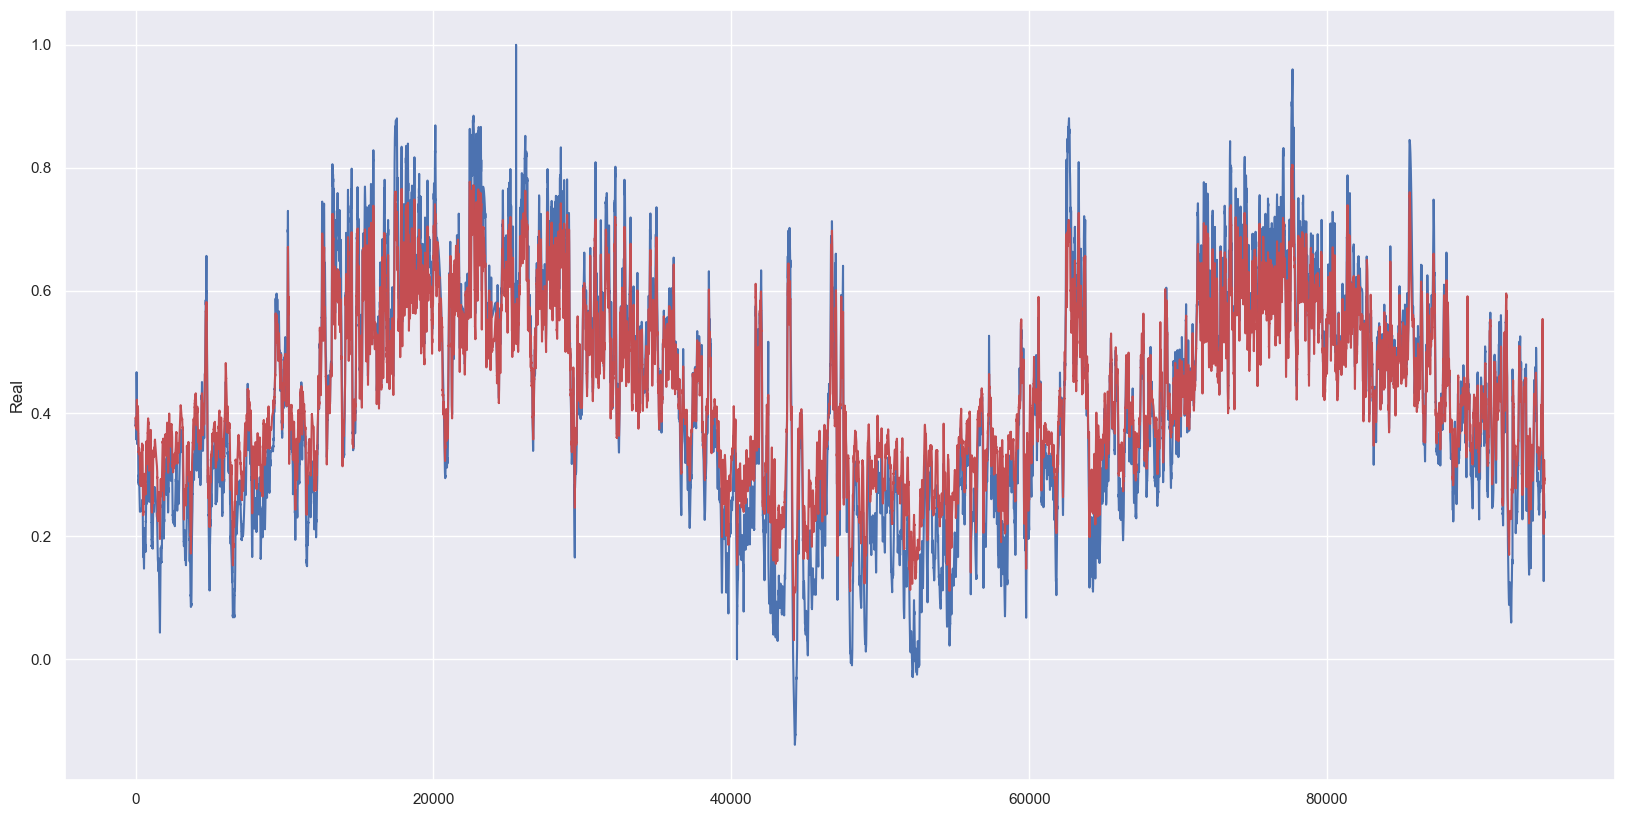

In [38]:
sns.set_theme(style = "darkgrid")
fig, axs = plt.subplots(figsize =(20, 10))
sns.lineplot(data =df_full, x=df_full.index, y="Real", ax=axs, color="b")
sns.lineplot(data =df_full, x=df_full.index, y="Prediction", ax=axs, color="r")

<AxesSubplot:ylabel='Difference'>

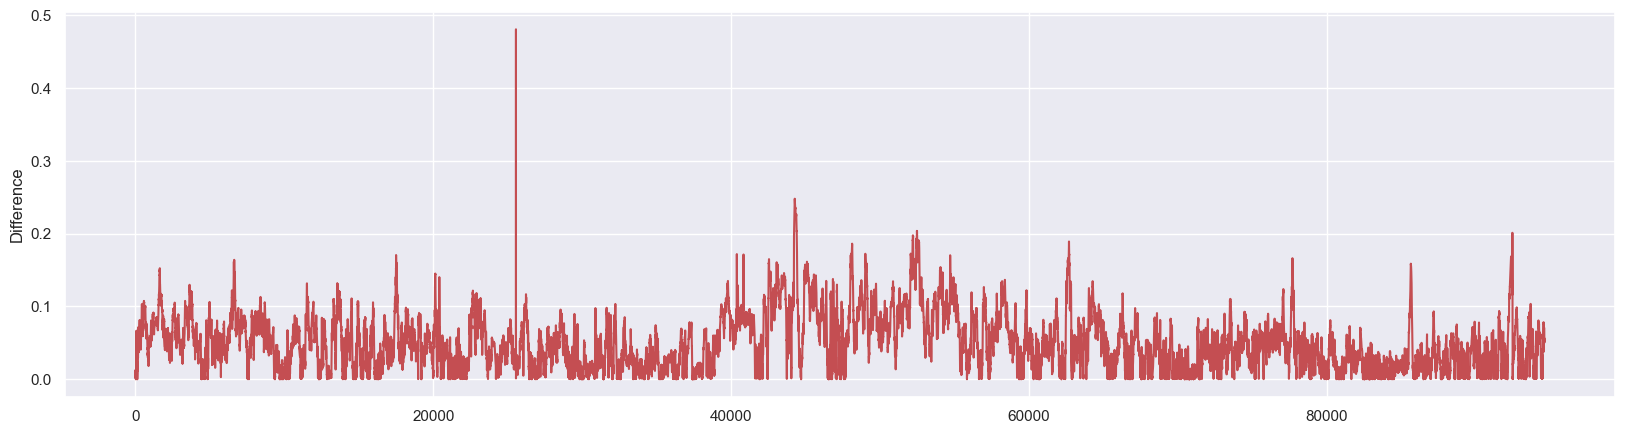

In [39]:
sns.set_theme(style = "darkgrid")
fig, axs = plt.subplots(figsize =(20, 5))
sns.lineplot(data =df_full['Difference'], ax=axs, color='r')

Moving Averange

In [40]:
def moving_average(df, value):
    #list_ma = df.rolling(value,min_periods=1).mean()
    list_ma = df.rolling(value).mean()
    return list_ma

In [41]:
# split a multivariate sequence into samples
def split_sequencesfecha(sequences, n_steps):
    X = list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x= sequences[end_ix-1]
        X.append(seq_x)
    return array(X)

In [42]:
fechatrain=split_sequencesfecha(training['date_time'], 144)
fechaval=split_sequencesfecha(validation['date_time'], 144)
fechatest=split_sequencesfecha(test['date_time'], 144)
fechafull = np.concatenate((fechatrain,fechaval,fechatest))

In [43]:
tiempo = pd.DataFrame({'date_time': fechafull})

In [44]:
x2metr = np.concatenate((xtrain,xvalidation))

In [45]:
def ma(diferencia,numdatos):
    aux = pd.DataFrame(diferencia)
    #aux['Anomaly'] = pd.DataFrame(diferencia)
    auxma=moving_average(aux, numdatos)
    diferencia2=auxma[0:len(x2metr)-1]
    meandiff=np.mean(diferencia2)
    stdiff=np.std(diferencia2)
    tiempo["diferencia"]=auxma
    tiempo["target"]=0
    thr1 = meandiff + 6*stdiff
    thr2 = meandiff + 5*stdiff
    thr3 = meandiff + 3*stdiff
    thr4 = meandiff + 2*stdiff
    
    return auxma,meandiff,stdiff,thr1,thr2,thr3,thr4

In [46]:
def threshold():
    datatest1["threshold1"]=float(threshold1)
    datatest1["threshold2"]=float(threshold2)
    datatest1["threshold3"]=float(threshold3)
    datatest1["threshold4"]=float(threshold4)
    return 

In [47]:
def monthAgo(date):
    date = pd.to_datetime(date)
    month = date-timedelta(days=30)
    return month

def tagClass(dataframe,numClasses,startFailure):
    c=0.1
    dataframe=dataframe.copy()
    dataframe['date_time']=pd.to_datetime(dataframe['date_time'])
    for i in range(numClasses):
        if i==0:
            startDate=startFailure
            finishDate=monthAgo(startFailure)
            
            dataframe.loc[(dataframe['date_time']>=finishDate)&(dataframe['date_time']<startDate),'target']=0.1
        else:
            startDate=finishDate
            finishDate=monthAgo(finishDate)
            
            dataframe.loc[(dataframe['date_time']>=finishDate)&(dataframe['date_time']<startDate),'target']=c+0.1
        c+=0.1
    
    return dataframe

In [48]:
auxma1,meandiff1,stdiff1,threshold1,threshold2,threshold3,threshold4=ma(df_full['Difference'],144)

In [49]:
datatest1=tagClass(tiempo,6,pd.to_datetime("21/05/2018").replace(minute=0, hour=0, second=0))
threshold()

datatest1["meandiff"]=float(meandiff1)
datatest1["stdiff"]=float(stdiff1)

In [50]:
datatest1["meandiff"].shape

(94611,)

In [51]:
auxma1.shape

(94611, 1)

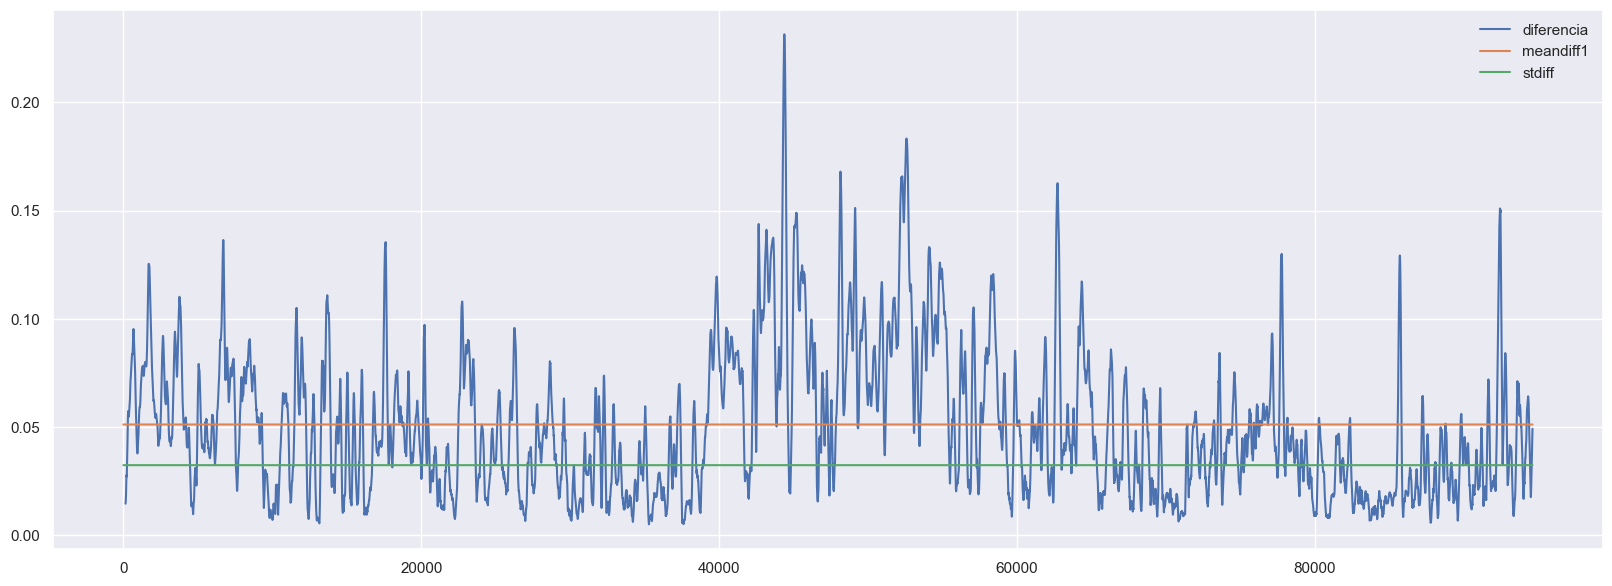

In [52]:
plt.figure(figsize=(20, 7))
plt.plot(auxma1, label='diferencia')
plt.plot(datatest1["meandiff"], label='meandiff1')
plt.plot(datatest1["stdiff"], label='stdiff')
plt.legend(frameon=False)

In [53]:
plt.savefig("Test2_mean.png")

<Figure size 640x480 with 0 Axes>

In [54]:
def datatime_categorias():

    datatest1['categoria']=0
    #training
    fecha1=pd.to_datetime("2017/02/06").replace(minute=0, hour=0, second=0)
    #validation
    fecha2=pd.to_datetime(validation["date_time"][0]).replace(minute=0, hour=0, second=0)
    # fin training - validation
    fecha3=pd.to_datetime("2017/12/31").replace(minute=0, hour=0, second=0)
    ########
    fecha4=pd.to_datetime("2018/12/01").replace(minute=0, hour=0, second=0)

    datatest1.loc[(datatest1['date_time']>=fecha1)&(datatest1['date_time']<fecha2),'categoria']=200
    datatest1.loc[(datatest1['date_time']>=fecha2)&(datatest1['date_time']<=fecha3),'categoria']=300
    datatest1.loc[(datatest1['date_time']>fecha3),'categoria']=400


    return 

In [55]:
import matplotlib.dates as mdates

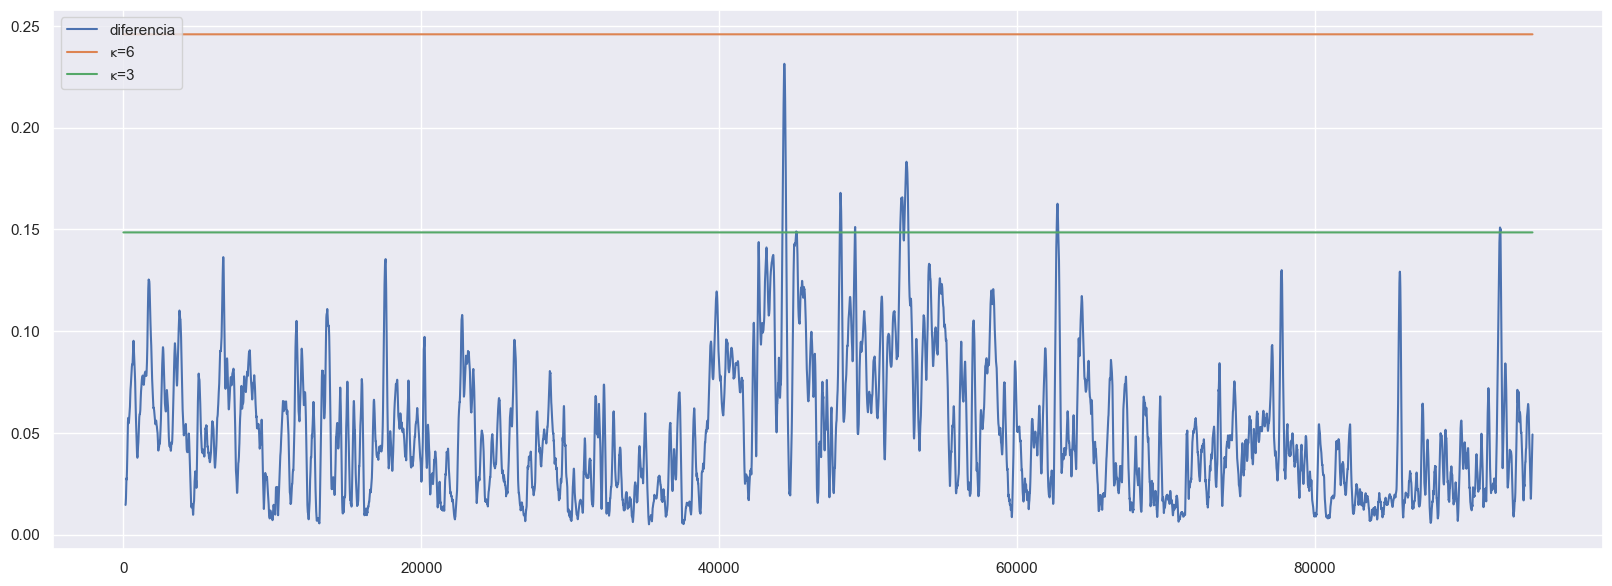

In [56]:
threshold()
datatime_categorias()
plt.figure(figsize=(20, 7))
plt.plot(auxma1, label='diferencia')
plt.plot(datatest1["threshold1"], label='$\mathrm{\mathbb{\kappa}}$=6')
plt.plot(datatest1["threshold3"], label='$\mathrm{\mathbb{\kappa}}$=3')

plt.legend(loc = 'upper left')

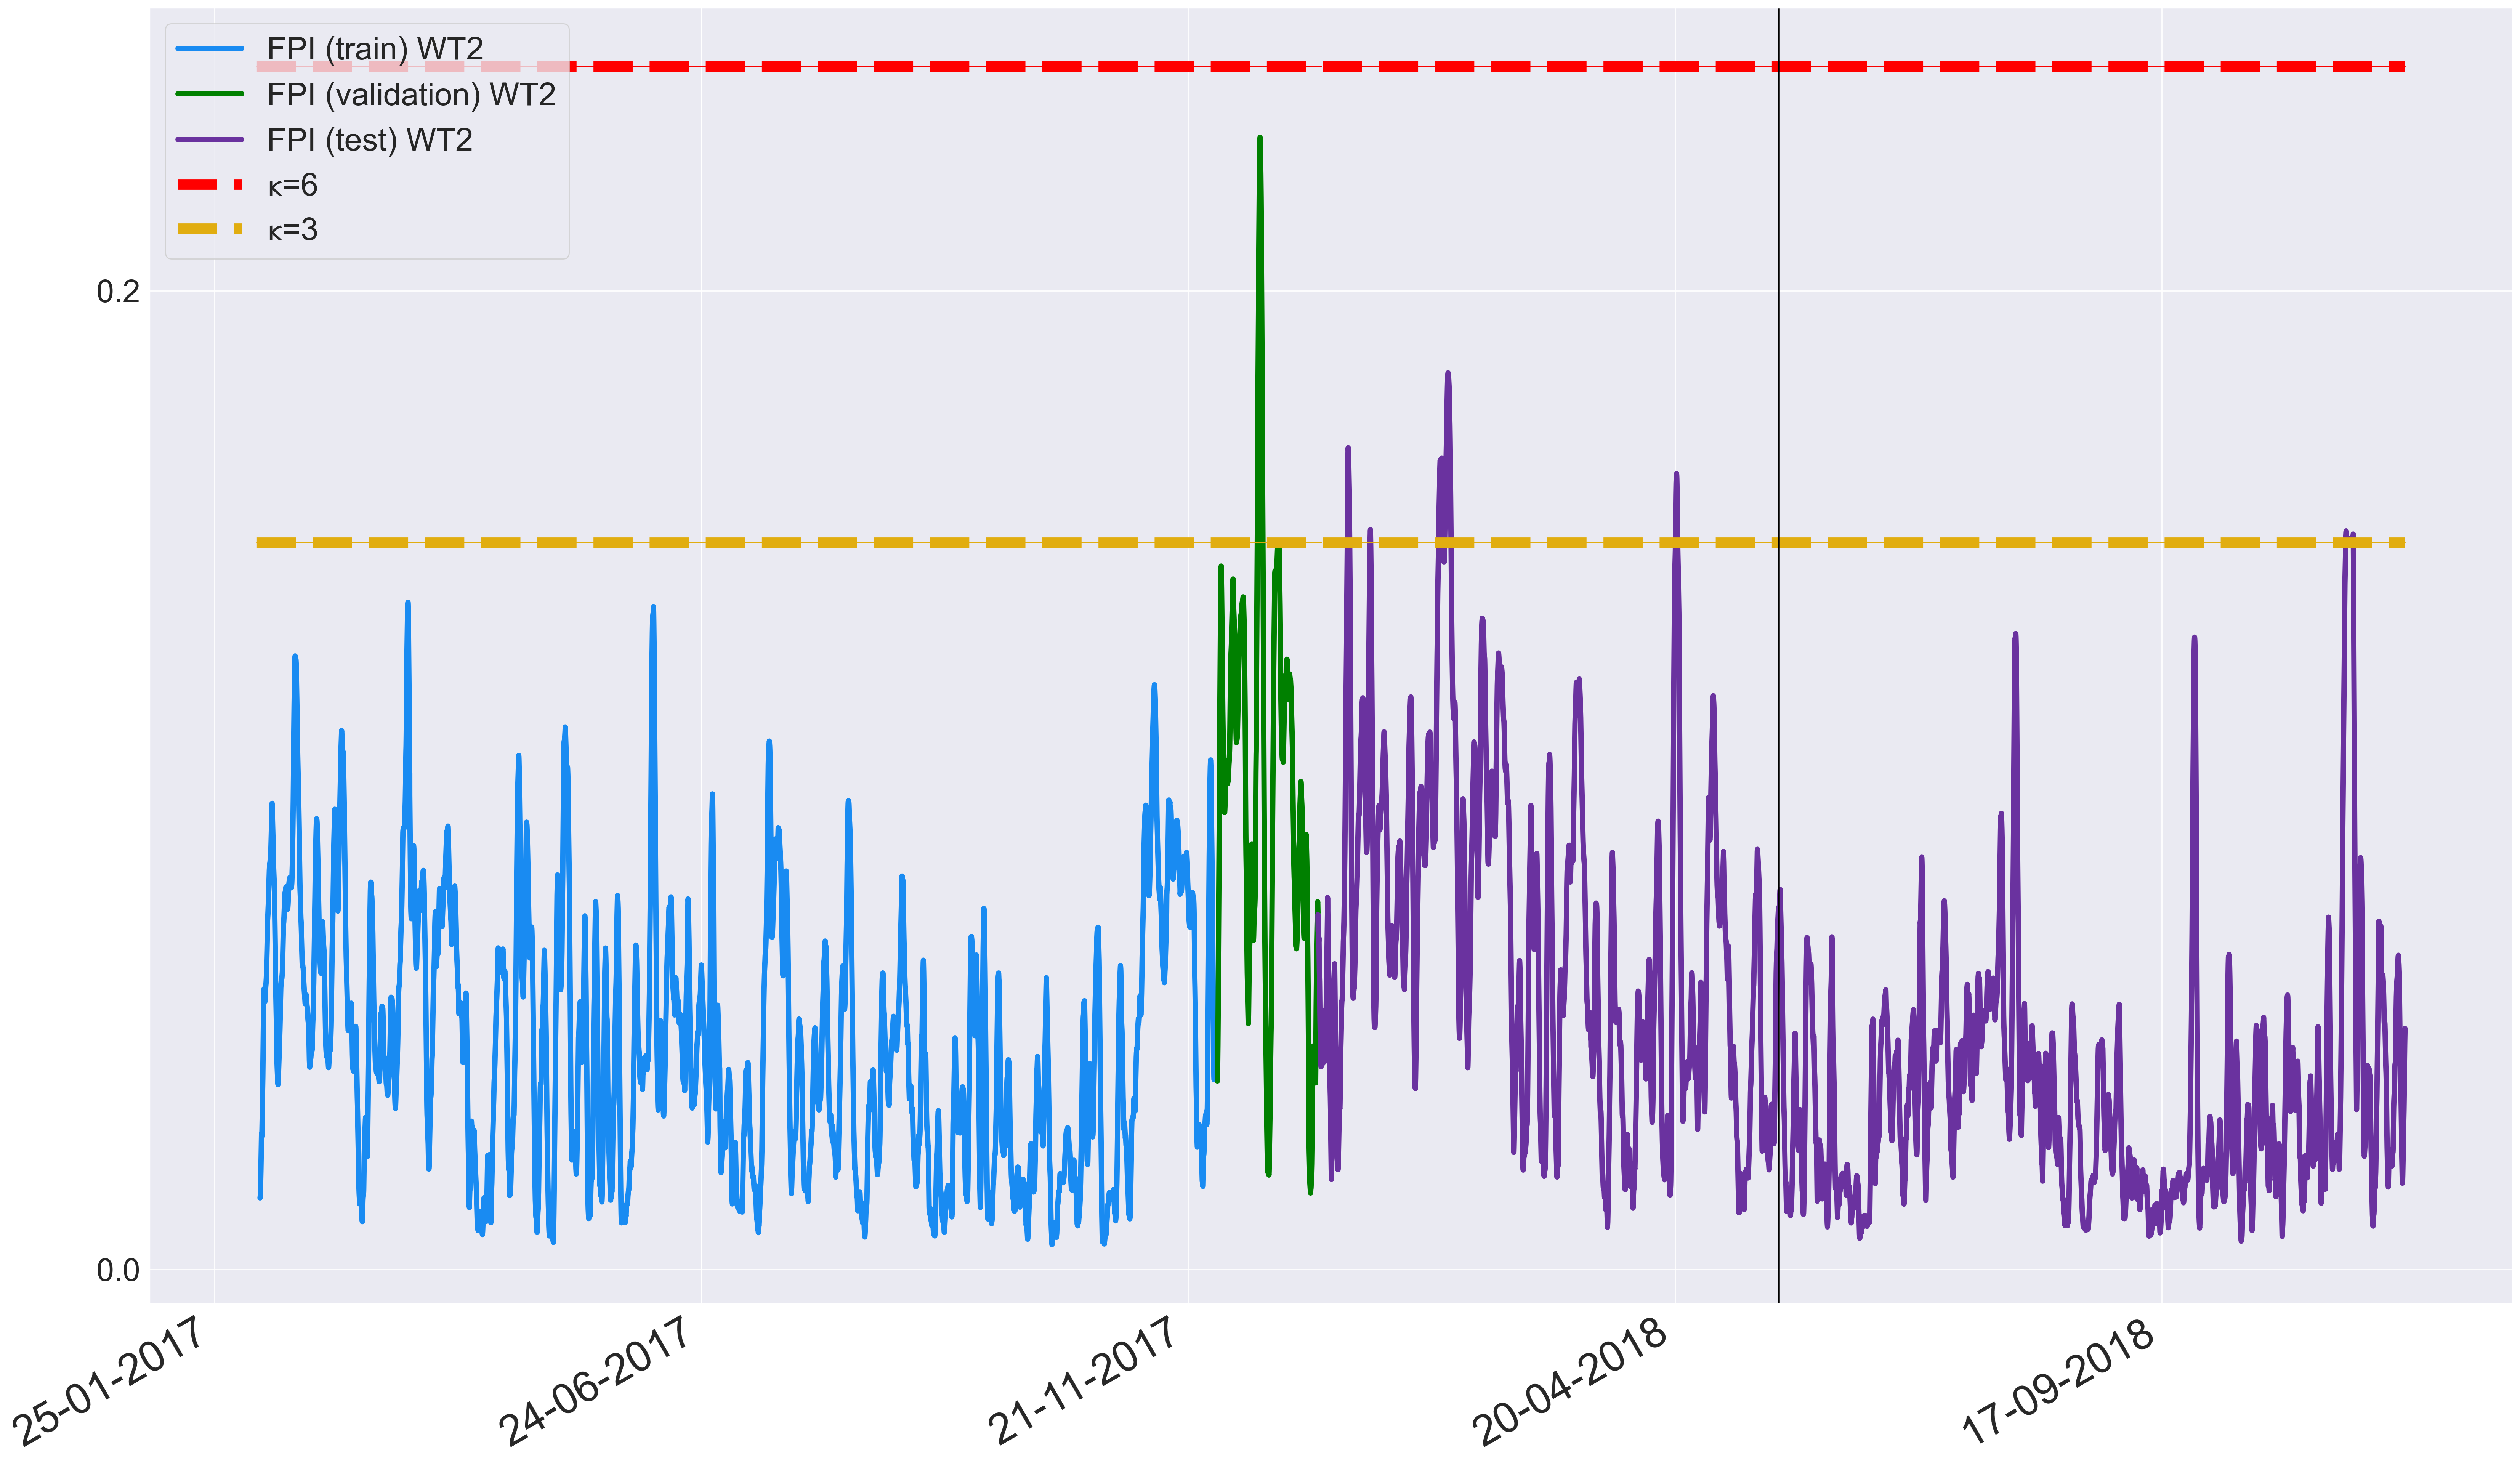

In [57]:
threshold()
datatime_categorias()

WT="WT1"
df1=datatest1[['date_time','diferencia','target','categoria']]
datosinindicador=datatest1
df2=datatest1[['date_time','diferencia','target','categoria']]

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(40, 25))

plt.plot_date(datatest1[datatest1["categoria"]==200]['date_time'], datatest1[datatest1["categoria"]==200]['diferencia'], color="#198bf2", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (train) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==300]['date_time'], datatest1[datatest1["categoria"]==300]['diferencia'], color="green", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (validation) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==400]['date_time'], datatest1[datatest1["categoria"]==400]['diferencia'], color="#6a329f", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (test) WT2')
plt.plot_date(datatest1["date_time"], datatest1["threshold1"], color="red", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=6')
plt.plot_date(datatest1["date_time"], datatest1["threshold3"], color="#e1ad10", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=3')

plt.axvline(pd.to_datetime('2018-05-21 23:50:00'), 0, 1,color="black",linewidth=2)

tick_spacing = 20

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.DayLocator(interval=150))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end+0.1, 0.2))

plt.xticks(fontsize=40)
plt.yticks(fontsize=30)

plt.legend(fontsize=30,loc = 'upper left')
plt.gcf().autofmt_xdate()
plt.tick_params(which='both', width=5, length=5)

In [58]:
auxma3,meandiff3,stdiff3,threshold1,threshold2,threshold3,threshold4=ma(df_full['Difference'],1008)

from datetime import datetime,timedelta
tiempo['date_time']=pd.to_datetime(tiempo['date_time'])
datatest1=tagClass(tiempo,6,pd.to_datetime("21/05/2018").replace(minute=0, hour=0, second=0))
threshold()

datatest1["meandiff"]=float(meandiff3)
datatest1["stdiff"]=float(stdiff3)

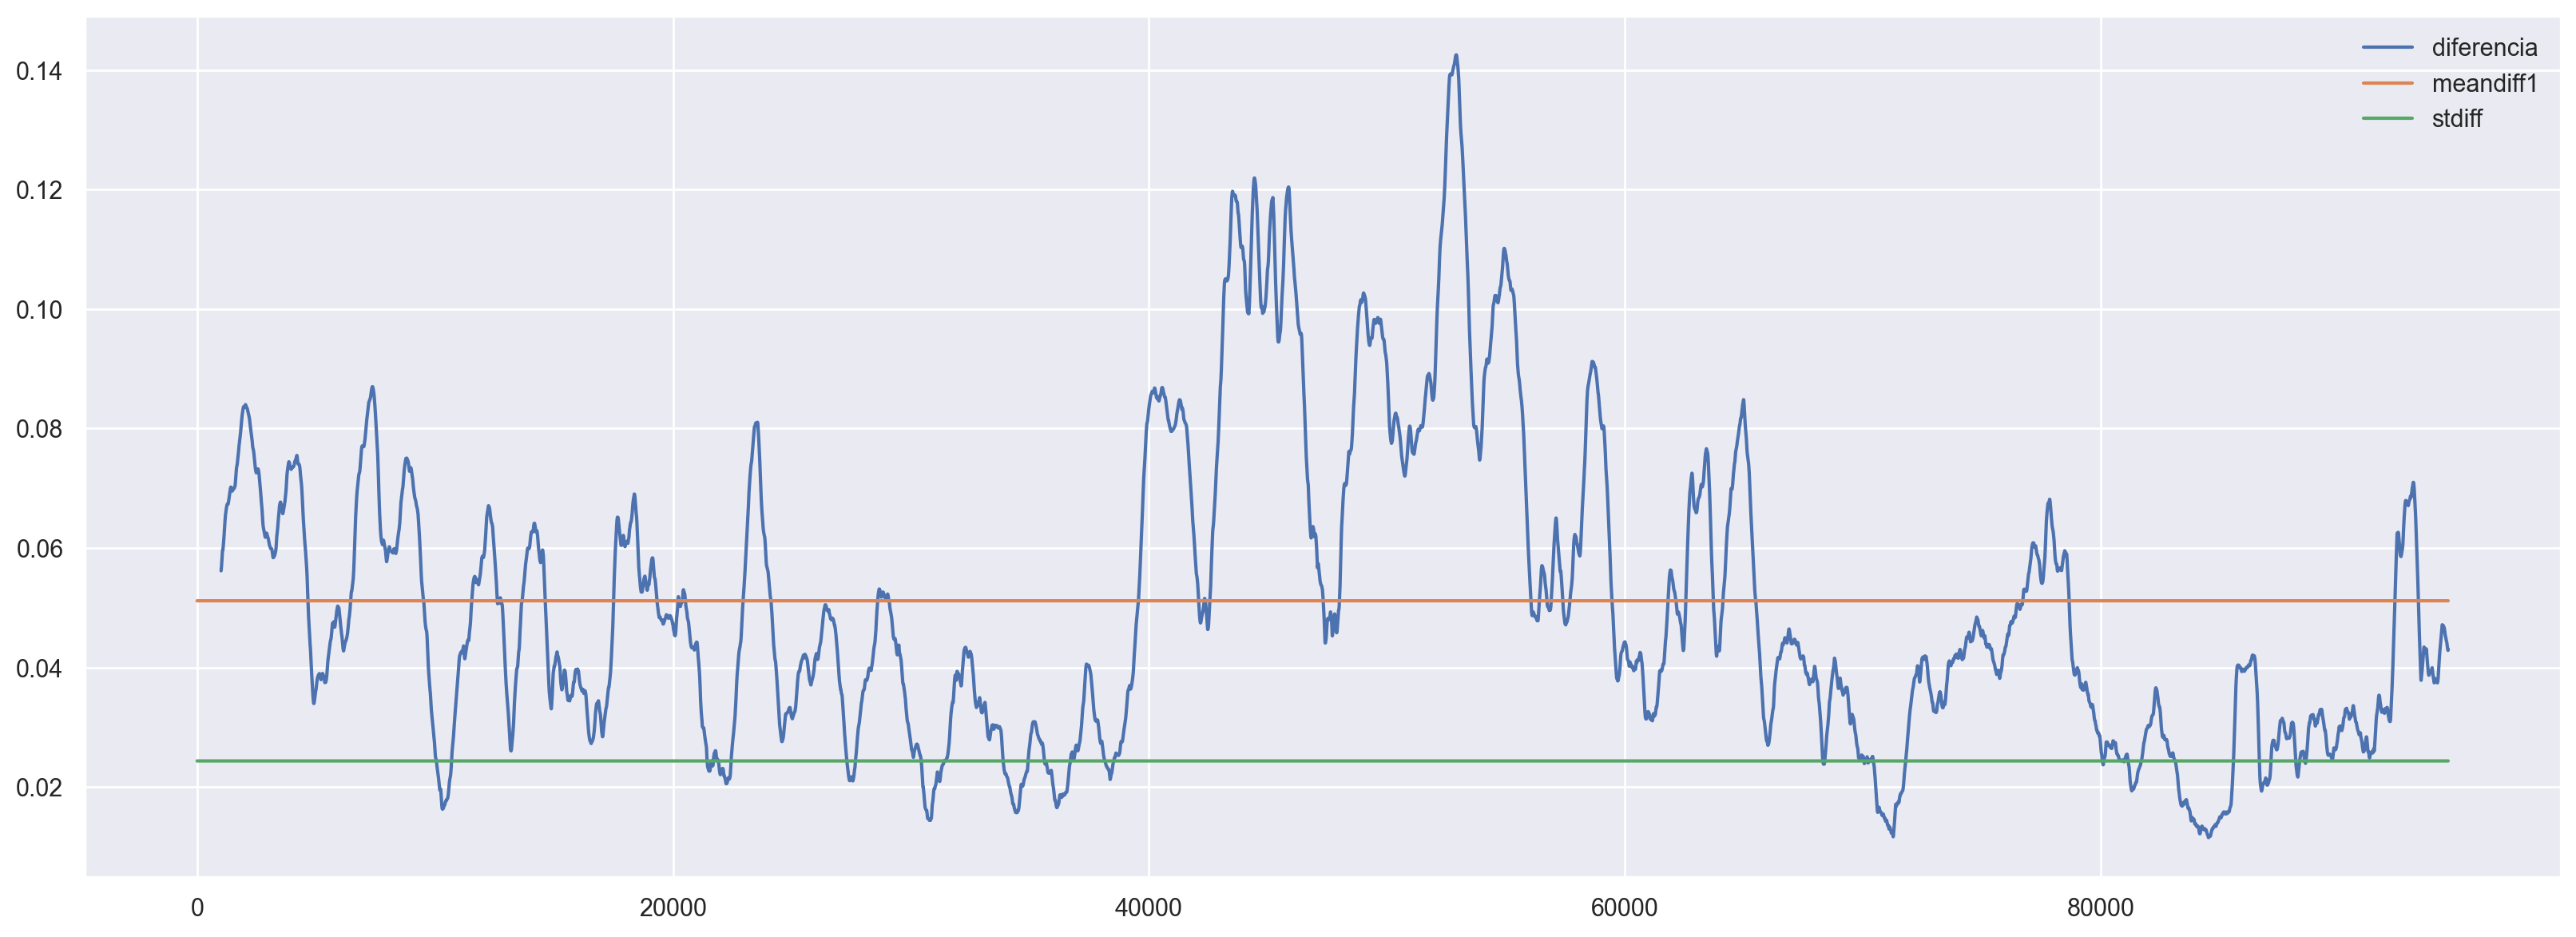

In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(auxma3, label='diferencia')
plt.plot(datatest1["meandiff"], label='meandiff1')
plt.plot(datatest1["stdiff"], label='stdiff')
plt.legend(frameon=False)

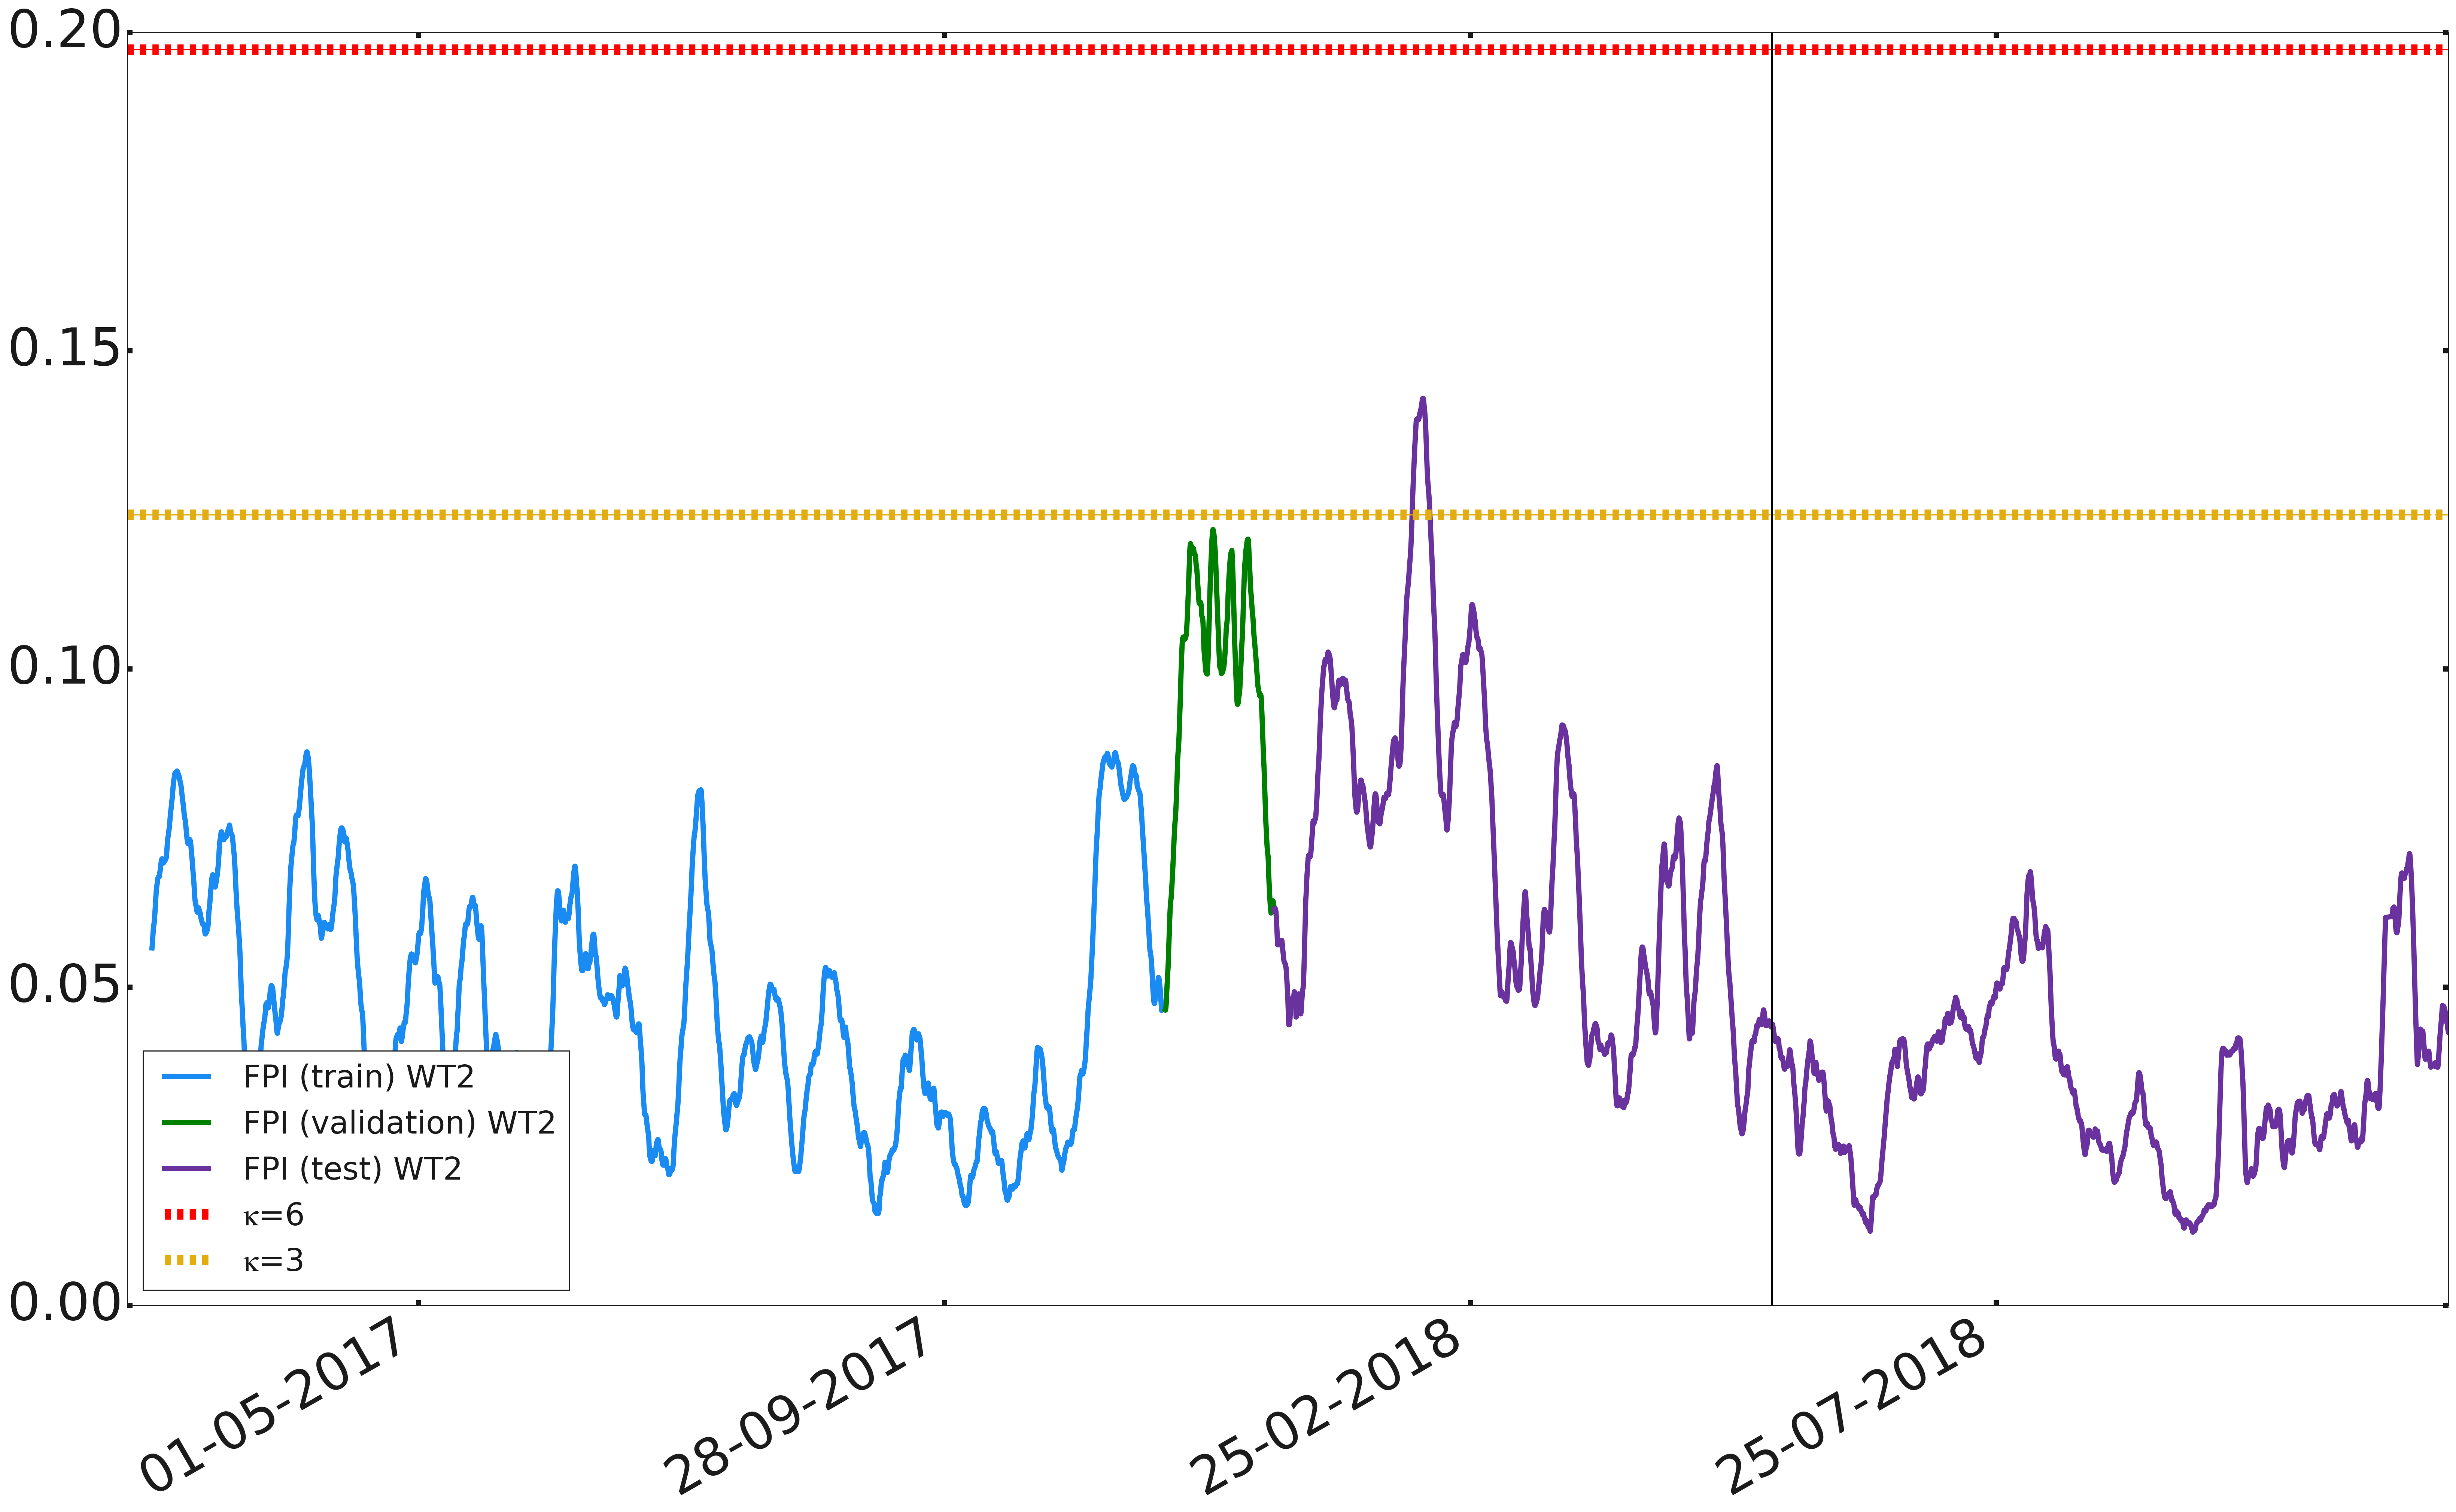

In [60]:
threshold()
datatime_categorias()

WT="WT1"
df1=datatest1[['date_time','diferencia','target','categoria']]
datosinindicador=datatest1
df2=datatest1[['date_time','diferencia','target','categoria']]

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize=(40, 25))
plt.style.use('classic')

plt.plot_date(datatest1[datatest1["categoria"]==200]['date_time'], datatest1[datatest1["categoria"]==200]['diferencia'], color="#198bf2", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (train) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==300]['date_time'], datatest1[datatest1["categoria"]==300]['diferencia'], color="green", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (validation) WT2')
plt.plot_date(datatest1[datatest1["categoria"]==400]['date_time'], datatest1[datatest1["categoria"]==400]['diferencia'], color="#6a329f", marker=".", markersize=1, linestyle='solid',linewidth=5,label='FPI (test) WT2')
plt.plot_date(datatest1["date_time"], datatest1["threshold1"], color="red", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=6')
plt.plot_date(datatest1["date_time"], datatest1["threshold3"], color="#e1ad10", marker=".", markersize=0.1, linestyle='dashed',linewidth=10,label='$\mathrm{\mathbb{\kappa}}$=3')

plt.axvline(pd.to_datetime('2018-05-21 23:50:00'), 0, 1,color="black",linewidth=2)

tick_spacing = 20

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.DayLocator(interval=150))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end+0.02, 0.05))

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

plt.legend(fontsize=30,loc = 'lower left')
plt.gcf().autofmt_xdate()
plt.tick_params(which='both', width=5, length=5)
#plt.savefig('../Testing plots/test_WT2346_v3.png')

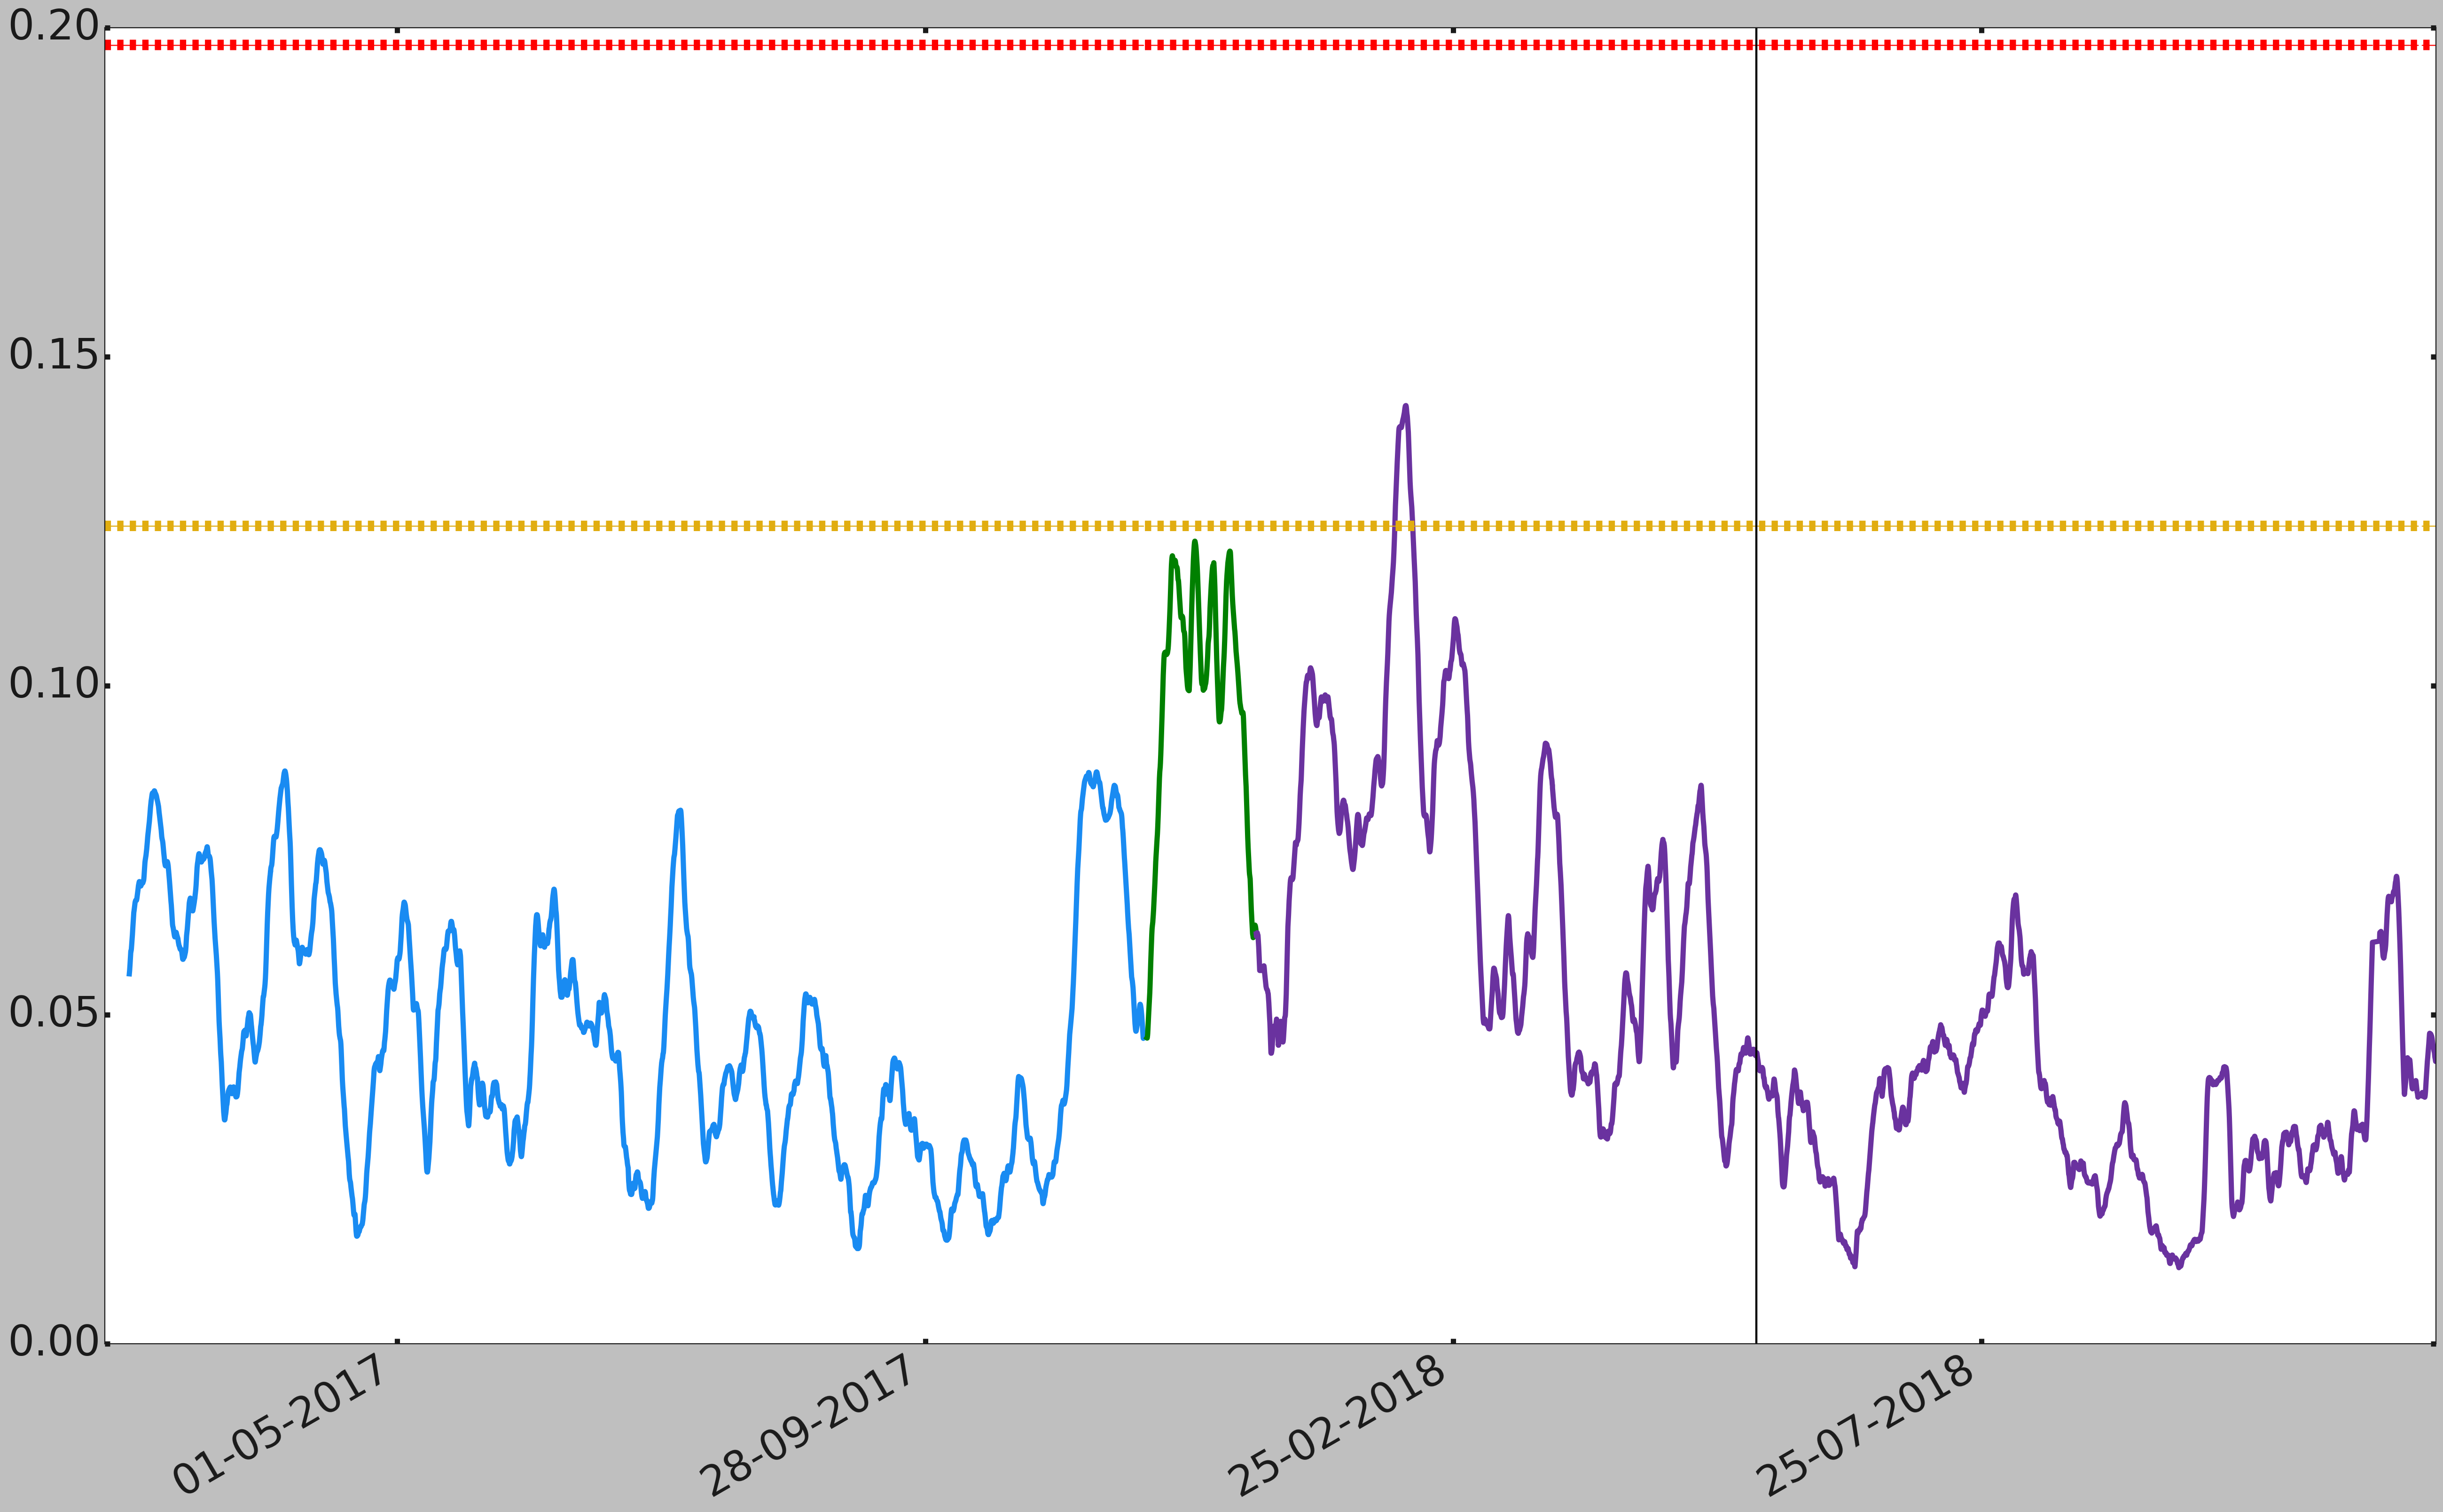

In [61]:
threshold()
datatime_categorias()

WT="WT1"
df1=datatest1[['date_time','diferencia','target','categoria']]
datosinindicador=datatest1
df2=datatest1[['date_time','diferencia','target','categoria']]

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.figure(figsize=(40, 25))
plt.style.use('classic')

plt.plot_date(datatest1[datatest1["categoria"]==200]['date_time'], datatest1[datatest1["categoria"]==200]['diferencia'], color="#198bf2", marker=".", markersize=1, linestyle='solid',linewidth=5)
plt.plot_date(datatest1[datatest1["categoria"]==300]['date_time'], datatest1[datatest1["categoria"]==300]['diferencia'], color="green", marker=".", markersize=1, linestyle='solid',linewidth=5)
plt.plot_date(datatest1[datatest1["categoria"]==400]['date_time'], datatest1[datatest1["categoria"]==400]['diferencia'], color="#6a329f", marker=".", markersize=1, linestyle='solid',linewidth=5)
plt.plot_date(datatest1["date_time"], datatest1["threshold1"], color="red", marker=".", markersize=0.1, linestyle='dashed',linewidth=10)
plt.plot_date(datatest1["date_time"], datatest1["threshold3"], color="#e1ad10", marker=".", markersize=0.1, linestyle='dashed',linewidth=10)

plt.axvline(pd.to_datetime('2018-05-21 23:50:00'), 0, 1,color="black",linewidth=2)

tick_spacing = 20

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.DayLocator(interval=150))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end+0.02, 0.05))

plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40)

#plt.legend(fontsize=30,loc = 'lower left')
plt.gcf().autofmt_xdate()
plt.tick_params(which='both', width=5, length=5)
plt.savefig('../plots/test_{}.png'.format(filename))